In [8]:
import matplotlib.pyplot as plt
import numpy as np

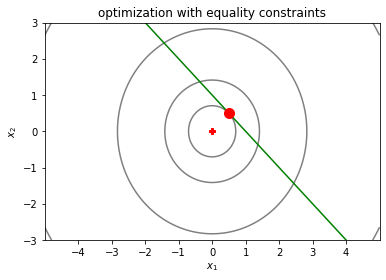

In [11]:
# 목적함수 f(x) = x1^2 + x2^2
def f1(x1, x2):
    return x1 ** 2 + x2 ** 2

x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f1(X1, X2)

# 등식 제한조건 방정식 g(x) = x1 + x2 - 1 = 0
x2_g = 1 - x1

plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8, 32])
plt.plot(x1, x2_g, 'g-')

plt.plot([0], [0], 'rP')
plt.plot([0.5], [0.5], 'ro', ms=10)

plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("optimization with equality constraints")
plt.show()


In [18]:
import scipy as sp

def f1array(x):
    return x[0] ** 2 + x[1] ** 2


def eq_constraint(x):
    return x[0] + x[1] - 1


sp.optimize.fmin_slsqp(f1array, np.array([1, 1]), eqcons=[eq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5000000000000002
            Iterations: 2
            Function evaluations: 8
            Gradient evaluations: 2


array([0.5, 0.5])

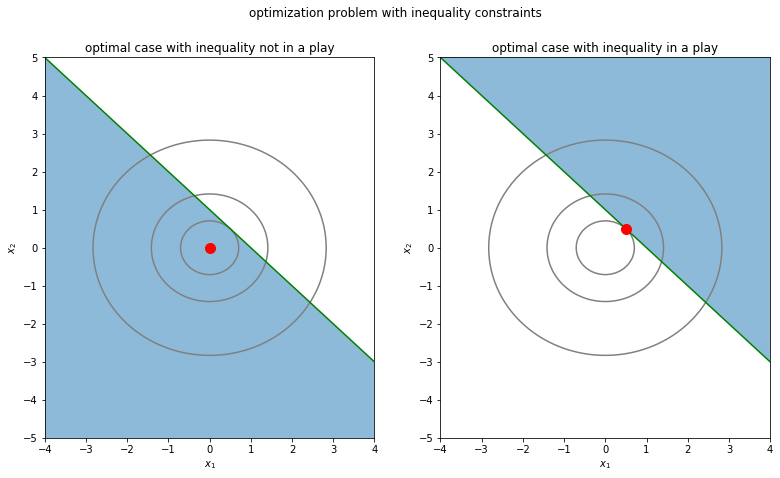

In [14]:
plt.figure(figsize=(13, 7))
ax1 = plt.subplot(121)
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8])
plt.plot(x1, x2_g, 'g-')
ax1.fill_between(x1, -20, x2_g, alpha=0.5)
plt.plot([0], [0], 'ro', ms=10)
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-5, 5, 11))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("optimal case with inequality not in a play")
ax2 = plt.subplot(122)
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8])
plt.plot(x1, x2_g, 'g-')
ax2.fill_between(x1, 20, x2_g, alpha=0.5)
plt.plot([0.5], [0.5], 'ro', ms=10)
plt.xlabel("x_1")
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-5, 5, 11))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("optimal case with inequality in a play")
plt.suptitle("optimization problem with inequality constraints")
plt.show()

Font 'default' does not have a glyph for '\uc81c' [U+c81c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud55c' [U+d55c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc870' [U+c870], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uac74' [U+ac74], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc744' [U+c744], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uac00' [U+ac00], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc9c0' [U+c9c0], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub294' [U+b294], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ucd5c' [U+cd5c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc801' [U+c801], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud654' [U+d654], 

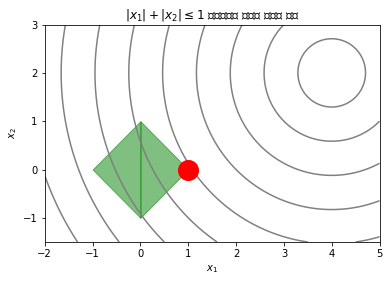

In [21]:
def f2plt(x1, x2):
    return np.sqrt((x1 - 4) ** 2 + (x2 - 2) ** 2)


x1 = np.linspace(-2, 5, 100)
x2 = np.linspace(-1.5, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f2plt(X1, X2)

plt.contour(X1, X2, Y, colors="gray",
            levels=np.arange(0.5, 5, 0.5) * np.sqrt(2))

# 제한 조건의 상수
k = 1
ax = plt.gca()
x12 = np.linspace(-k, 0, 10)
x13 = np.linspace(0, k, 10)
ax.fill_between(x12, x12 + k, -k - x12, color='g', alpha=0.5)
ax.fill_between(x13, x13 - k, k - x13, color='g', alpha=0.5)

# 최적점 위치
x1_sol = 1
x2_sol = 0
plt.plot(x1_sol, x2_sol, 'ro', ms=20)

plt.xlim(-2, 5)
plt.ylim(-1.5, 3)
plt.xticks(np.linspace(-2, 5, 8))
plt.yticks(np.linspace(-1, 3, 5))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("$|x_1| + |x_2| \leq {}$ 제한조건을 가지는 최적화 문제".format(k))
plt.show()

In [22]:
def f2(x):
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2) ** 2)

# 제한 조건 상수
k = 1
def ieq_constraint(x):
    return np.atleast_1d(k - np.sum(np.abs(x)))


sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.605551280732028
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11


array([9.99999981e-01, 1.89941792e-08])